## Medical Cost Personal Insurance Project

In [1]:
#Importing necessary libraries 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
ds=pd.read_csv(r'D:\Files\medical_cost_insurance.csv')
ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This dataset contains information related to Health insurance. It contains 1388 rows and 7 columns out of which 6 columns are inputs and 1 column is target variable i.e. 'charges' column.
This dataset contains numerical and catagorical data.The goal is to predict insurance cost.

In [3]:
ds.dtypes #Checking data types

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are three different types of data present in the dataset which are object, int64 and float64.

In [4]:
ds.isnull().sum() #Checking null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This dataset does not contains null values.

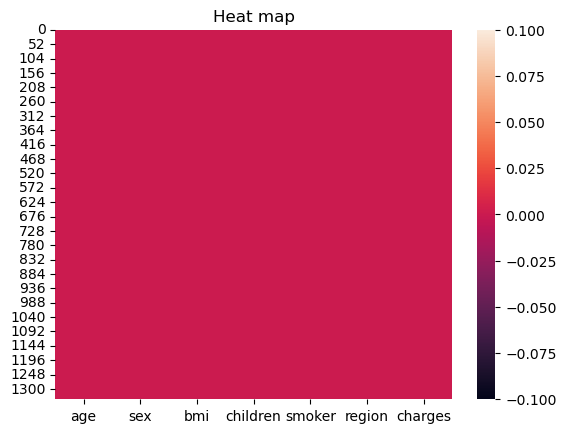

In [5]:
sb.heatmap(ds.isnull()) #Visualizing null values via heatmap
plt.title("Heat map")
plt.show()

This confirms that number of null values present in this data is none.

In [6]:
ds.info() #Checking more information related to dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This shows information related to the columns and about their Non-null count and Dtype. It also shows the memory usage , which is 73.3+KB in this case. 

In [7]:
c_list=ds.columns.tolist() #Storing columns name into list
for i in c_list:#Iterating c_list variable
    print('\n',i,':-\nUnique values:',ds[i].unique(),'\nNumber of unique values:',ds[i].nunique(),'\n\n',ds[i].value_counts().to_frame('Value Counts'))#Printing    


 age :-
Unique values: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39] 
Number of unique values: 47 

     Value Counts
18            69
19            68
50            29
51            29
47            29
46            29
45            29
20            29
48            29
52            29
22            28
49            28
54            28
53            28
21            28
26            28
24            28
25            28
28            28
27            28
23            28
43            27
29            27
30            27
41            27
42            27
44            27
31            27
40            27
32            26
33            26
56            26
34            26
55            26
57            26
37            25
59            25
58            25
36            25
38            25
35            25
39            25
61            23
60            23
63            23
62            23
6

This gives a breif information about unique values, count of unique values and value counts of each column present in the dataset. All values of target variable are almost unique values.

In [8]:
ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This gives the statistical information of the numerical columns.
From the above description we can observe the following:
1)All the columns have same count thus there are no missing values.
2)Mean is greater than 50% in charges column which means the data is skewed to the right.

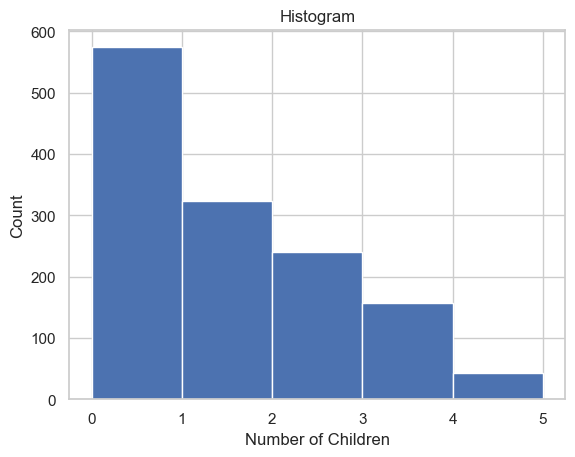

In [9]:
#Visualizing number of children via Histogram
sb.set_theme(style="whitegrid")
plt.hist(ds['children'],bins=[0,1,2,3,4,5])
plt.title("Histogram")
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show() 

The number of dependents with 0 count are comparatively higher than the rest of the dependents.

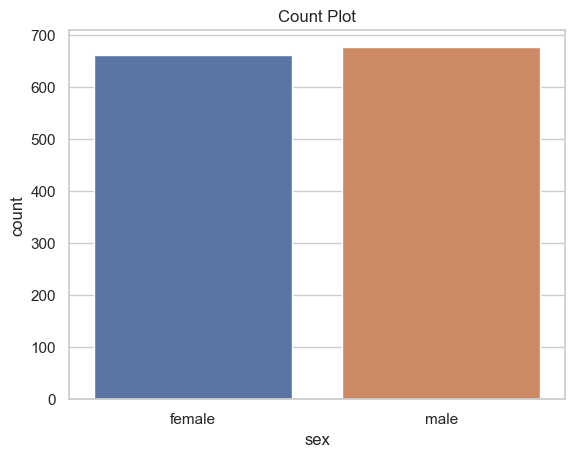

In [10]:
#Visualizing number of gender via Count plot
sb.countplot(x='sex',data=ds)
plt.title("Count Plot")
plt.show()

The number of males are bit high than number of females.

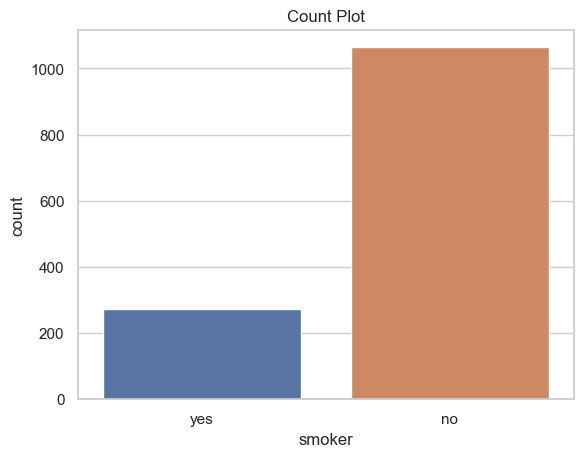

In [11]:
#Visualizing number of smokers via Count plot
sb.countplot(x='smoker',data=ds)
plt.title("Count Plot")
plt.show()

There are majority of non smokers.

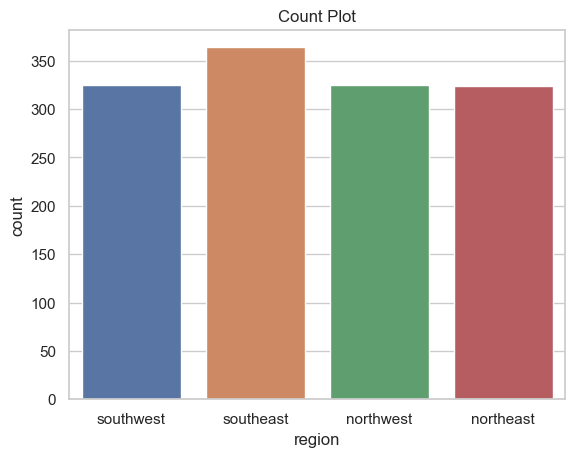

In [12]:
#Visualizing number of children via Count plot
sb.countplot(x='region',data=ds)
plt.title("Count Plot")
plt.show()

Almost all of them are the same number except for the southeast region. It is a little bit high from the others.

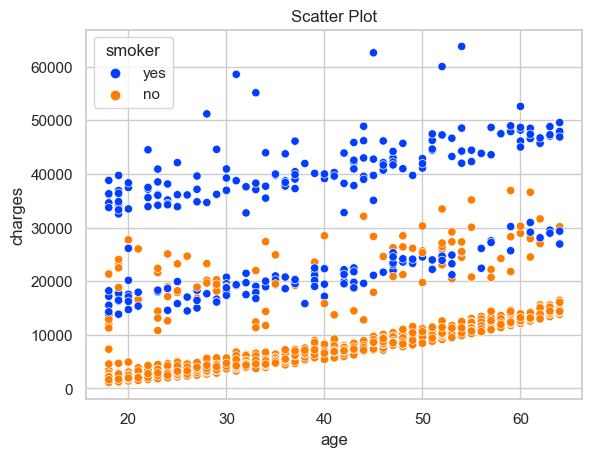

In [13]:
#Visualizing relation between features via Scatter plot
sb.scatterplot(x='age',y='charges',data=ds,hue='smoker',palette='bright')
plt.title("Scatter Plot")
plt.show()

It represents postive linear relation between charges and age. The people who smokes, tends to have high charges.

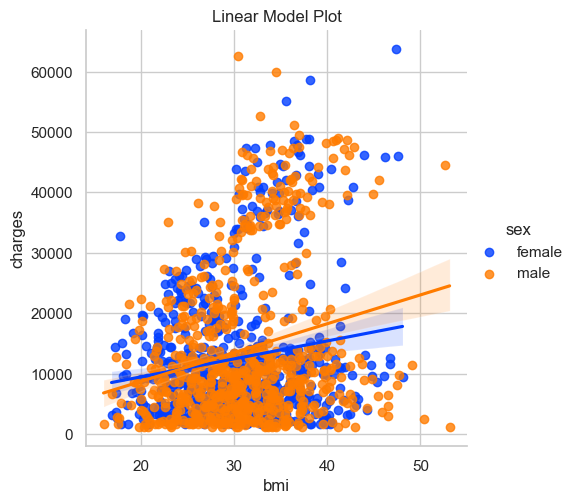

In [14]:
#Visualizing relation between features via Lm plot
sb.lmplot(x='bmi',y='charges',data=ds,hue='sex',palette='bright')
plt.title("Linear Model Plot")
plt.show()

It represents postive linear relation between charges and age.There is high concentration of the data points in charges features which ranges from 0 to 10000. The gender does not impact much between the features.

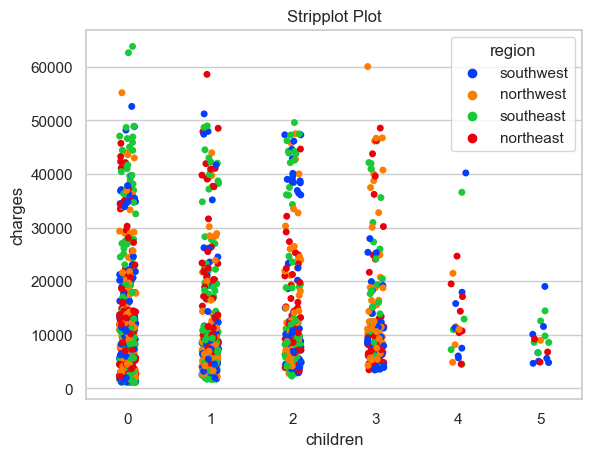

In [15]:
#Visualizing relation between features via Scatter plot
sb.stripplot(x='children',y='charges',data=ds,hue='region',palette='bright')
plt.title("Stripplot Plot")
plt.show()

It represents postive linear relation between charges and children. The region does not play a major role between the features.

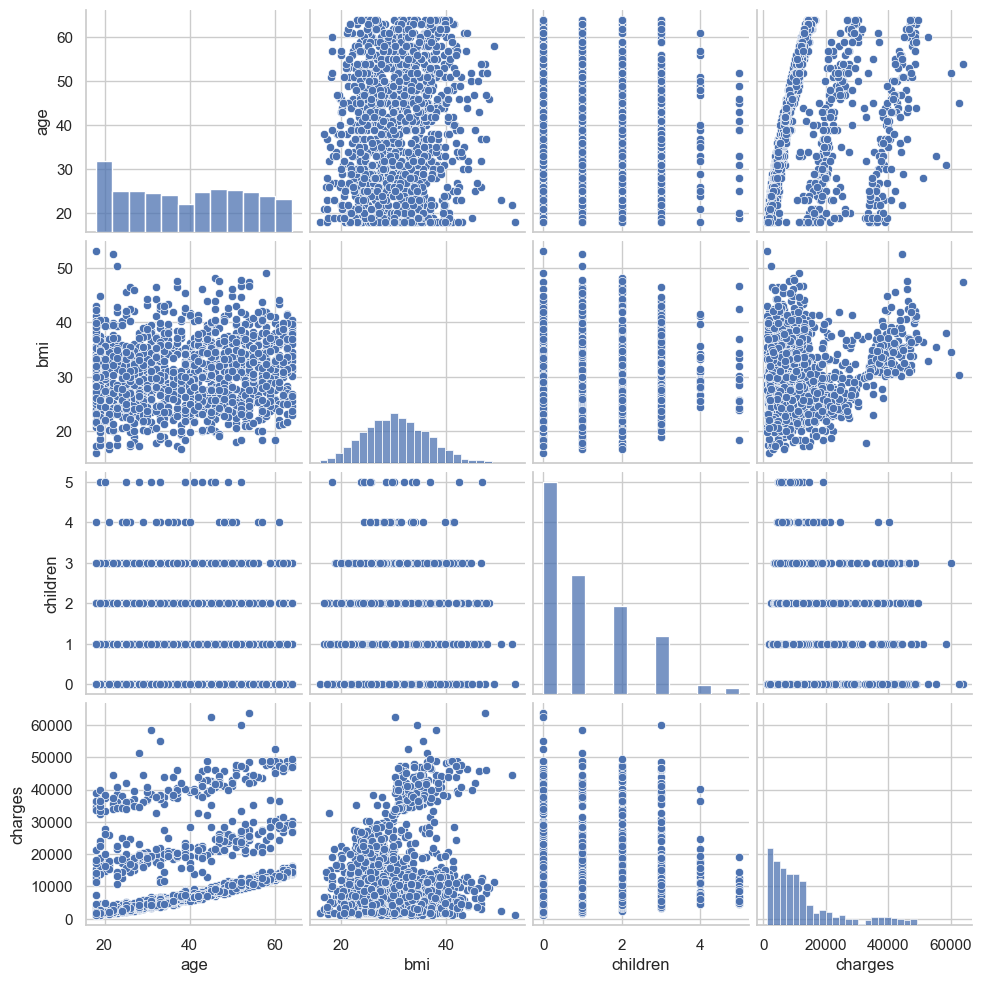

In [16]:
#Visualizing relation between features with multiple plots via Pair plot 
sb.pairplot(data=ds)
plt.show()

This gives pairwise relation ship between the features.

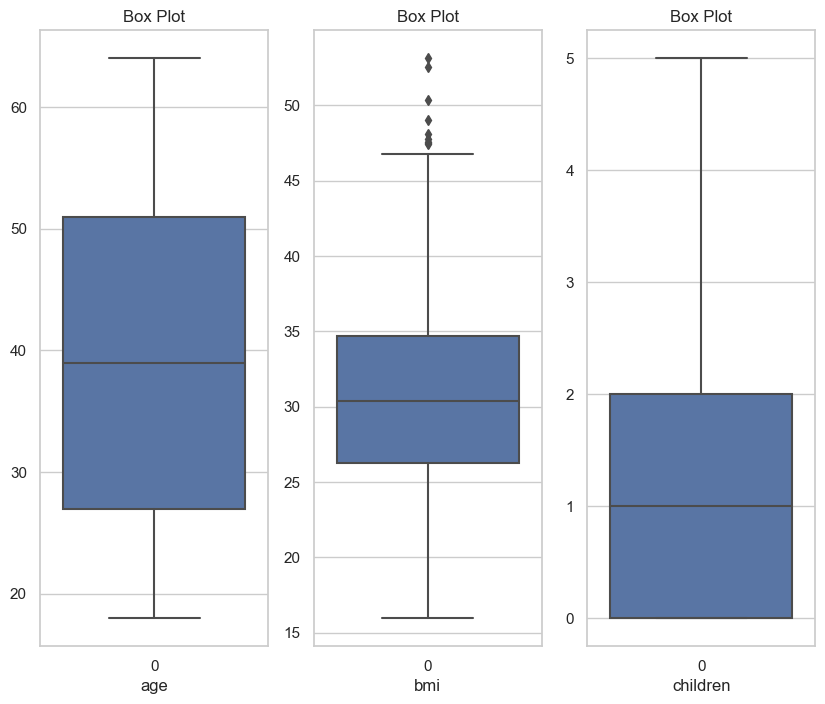

In [17]:
#Checking outliers
s=['age', 'bmi', 'children']
a=1
plt.figure(figsize=(10,8))
for i in s:
    if a<=6:
        plt.subplot(1,3,a)
        sb.boxplot(ds[i])
        plt.xlabel(i)
        plt.title('Box Plot')
    a+=1
plt.show()    

We can see that there are outliers present in bmi feature

In [18]:
#removing outliers using zscore
#Importing necessary libraries
from scipy.stats import zscore as zs
import numpy as np
f_outlier=ds[['bmi']]
z=np.abs(zs(f_outlier))
z

,bmi
0,0.453320
1,0.509621
2,0.383307
3,1.305531
4,0.292556
...,...
1333,0.050297
1334,0.206139
1335,1.014878
1336,0.797813


The variables z holds the zscores values of bmi column.

In [19]:
np.where(z>3)

(array([ 116,  847, 1047, 1317], dtype=int64),
 array([0, 0, 0, 0], dtype=int64))

These are the ouliers present in the feature.

In [20]:
z.iloc[116,0]

3.0178611981425605

In [21]:
z.iloc[847,0]

3.234399911917402

We have confirmed that these values holds outliers as per the threshold value.

In [22]:
#Removing outliers
n_ds=ds[(z<3).all(axis=1)]

In [23]:
#Using IQR method to verify that can it remove outliers with less data loss than zscore method?
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
n_ds2=ds[~((ds< (q1-1.5*iqr)) | (ds>(q3+1.5*iqr))).any(axis=1)]

In [24]:
print('Data loss percentage after removing outliers via zscore',((ds.shape[0]-n_ds.shape[0])/ds.shape[0])*100)
print('Data loss percentage after removing outliers via IQR',((ds.shape[0]-n_ds2.shape[0])/ds.shape[0])*100)

Data loss percentage after removing outliers via zscore 0.29895366218236175
Data loss percentage after removing outliers via IQR 0.672645739910314


We can observe that zscore method performed well here, hence, we will update the dataframe with zscore method.

In [25]:
ds=n_ds#Updating

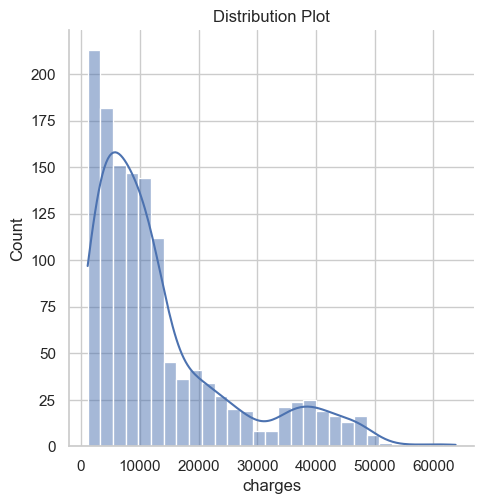

In [26]:
sb.displot(ds['charges'],kde=True)
plt.title('Distribution Plot')
plt.show()

This show that the data is skewed to the right.

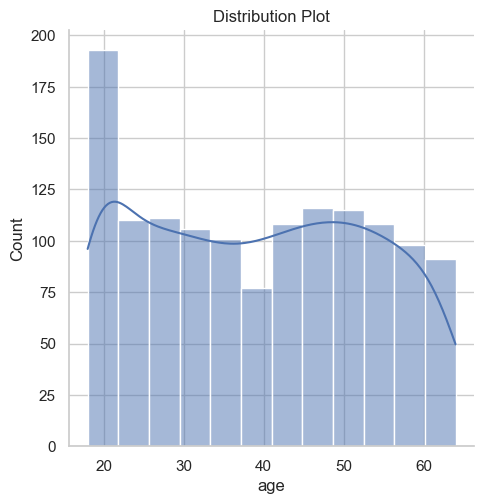

In [27]:
sb.displot(ds['age'],kde=True)
plt.title('Distribution Plot')
plt.show()

This shows that the data is almost normally distributed

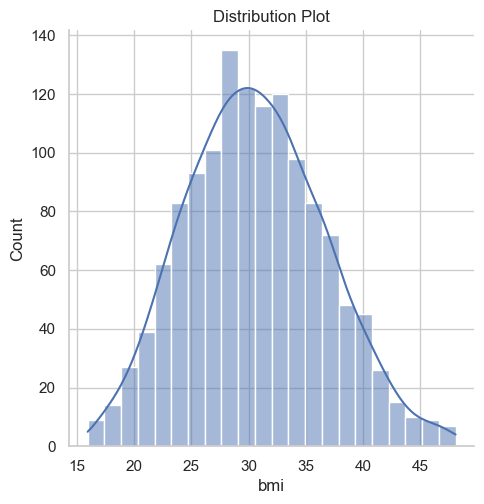

In [28]:
sb.displot(ds['bmi'],kde=True)
plt.title('Distribution Plot')
plt.show()

This shows that the data is almost normally distributed

In [29]:
ds.skew()#Checking skewness

age         0.053603
bmi         0.205622
children    0.935415
charges     1.517663
dtype: float64

Label does not fall between the accpetable range, thus we'll use cuberoot method to remove the skewness

In [30]:
ds['charges']=np.cbrt(ds['charges'])

In [31]:
ds.skew()

age         0.053603
bmi         0.205622
children    0.935415
charges     0.516247
dtype: float64

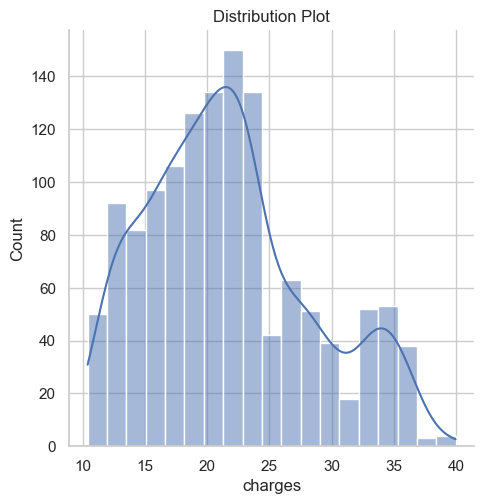

In [32]:
sb.displot(ds['charges'],kde=True)
plt.title('Distribution Plot')
plt.show()

As we can see, there is still skewness thus, we'll try log method.

In [33]:
ds['charges']=np.log(ds['charges'])

In [34]:
ds.skew()

age         0.053603
bmi         0.205622
children    0.935415
charges    -0.088295
dtype: float64

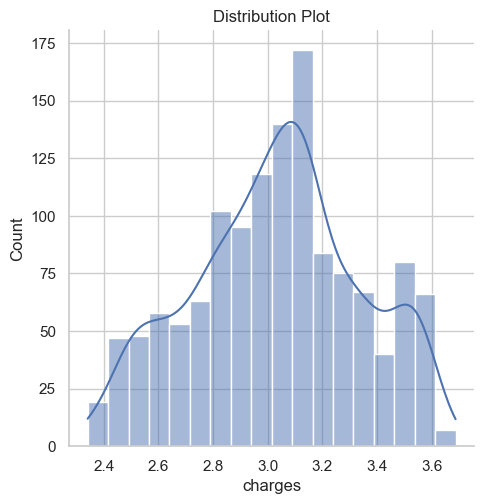

In [35]:
sb.displot(ds['charges'],kde=True)
plt.title('Distribution Plot')
plt.show()

Skewness is removed via log method.

In [36]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,3.244725
1,18,male,33.770,1,no,southeast,2.484434
2,28,male,33.000,3,no,southeast,2.800179
3,33,male,22.705,0,no,northwest,3.332697
4,32,male,28.880,0,no,northwest,2.753399
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,3.089554
1334,18,female,31.920,0,no,northeast,2.566309
1335,18,female,36.850,0,no,southeast,2.465411
1336,21,female,25.800,0,no,southwest,2.534956


In [37]:
ds['sex']=le.fit_transform(ds['sex'])#Transforming sex column

In [38]:
ds['smoker']=le.fit_transform(ds['smoker'])#Transforming smoker column

In [39]:
ds['region']=le.fit_transform(ds['region'])#Transforming region column

In [40]:
ds

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,3.244725
1,18,1,33.770,1,0,2,2.484434
2,28,1,33.000,3,0,2,2.800179
3,33,1,22.705,0,0,1,3.332697
4,32,1,28.880,0,0,1,2.753399
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,3.089554
1334,18,0,31.920,0,0,0,2.566309
1335,18,0,36.850,0,0,2,2.465411
1336,21,0,25.800,0,0,3,2.534956


All of the categorical columns have been encoded.

In [41]:
#Checking correlation between independant and dependant varibales
cor=ds.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019041,0.118887,0.042345,-0.023820,0.002974,0.528794
sex,-0.019041,1.000000,0.037031,0.018667,0.076096,0.003293,0.006873
bmi,0.118887,0.037031,1.000000,0.018054,0.002264,0.155877,0.139883
children,0.042345,0.018667,0.018054,1.000000,0.007087,0.017234,0.160729
smoker,-0.023820,0.076096,0.002264,0.007087,1.000000,-0.002333,0.665312
region,0.002974,0.003293,0.155877,0.017234,-0.002333,1.000000,-0.042327
charges,0.528794,0.006873,0.139883,0.160729,0.665312,-0.042327,1.000000


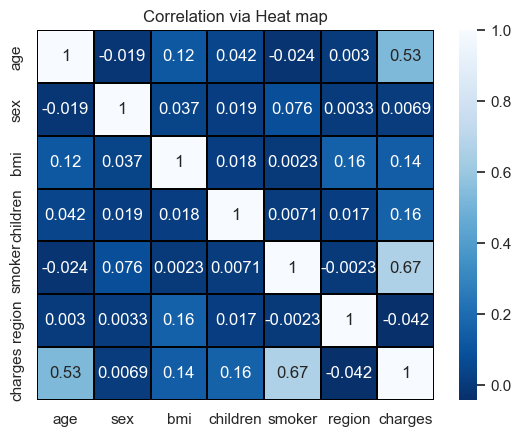

In [42]:
#Visualizing correlation
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1)
plt.title('Correlation via Heat map')
plt.show()

We can observer the following from this heatmap:
1)Age and smoker columns have positive medium correlation with target variable.
2)sex, bmi and children columns low have positve correlation with the target variable.
3)region column have low negative correlation with the target variable.

In [43]:
#Separating features and target variable 
x=ds.drop('charges',axis=1)
y=ds['charges']

In [44]:
#checking dimensions of featues and label 
print('Dimensions of features:',x.shape[0],'\nDimensions of label:',y.shape[0])

Dimensions of features: 1334 
Dimensions of label: 1334


We can observe that both have same number of dimensions

In [45]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc
sc=sc()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.442249,-1.007525,-0.450359,-0.909299,1.971407,1.343594
1,-1.513528,0.992532,0.528191,-0.080177,-0.507252,0.439278
2,-0.800739,0.992532,0.399829,1.578066,-0.507252,0.439278
3,-0.444344,0.992532,-1.316383,-0.909299,-0.507252,-0.465038
4,-0.515623,0.992532,-0.286989,-0.909299,-0.507252,-0.465038
...,...,...,...,...,...,...
1329,0.767397,0.992532,0.061421,1.578066,-0.507252,-0.465038
1330,-1.513528,-1.007525,0.219789,-0.909299,-0.507252,-1.369355
1331,-1.513528,-1.007525,1.041637,-0.909299,-0.507252,0.439278
1332,-1.299692,-1.007525,-0.800436,-0.909299,-0.507252,1.343594


The data is scaled using StandarScaler method to overcome the issue of biasness.

In [46]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library
v=pd.DataFrame()
v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]
v['Features']=x.columns
v

,VIF,Features
0,1.017416,age
1,1.008033,sex
2,1.041585,bmi
3,1.002610,children
4,1.006389,smoker
5,1.025419,region


Here we can observe that the features do not have multicollineraity problem.

In [47]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as l
from sklearn.metrics import r2_score

In [48]:
#Finding best random state
ac_updater=0
rs_updater=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
    lr=l()
    lr.fit(x_train,y_train)
    pr=lr.predict(x_test)
    ac=r2_score(y_test,pr)
    if ac>ac_updater:
        ac_updater=ac
        rs_updater=i
print('Max r2 score during the iteration is ',ac_updater,'on randome state : ',rs_updater)

Max r2 score during the iteration is  0.8309524489014389 on randome state :  969


In [49]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)

In [50]:
#Importing necessary libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.svm import SVR as SupportVectorRegression
import numpy as np
from sklearn.model_selection import cross_val_score as cvs

#Creating instance
LR=LinearRegression()
L=Lasso()
R=Ridge()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ETR=ExtraTreesRegressor()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
SVR=SupportVectorRegression()
    
models=[LR,L,R,RFR,GBR,ETR,DTR,KNR,SVR]#Creating list
    
for i in models:#Iterating models 
    i.fit(x_train,y_train)
    pr=i.predict(x_test)
    R2score=r2_score(y_test,pr)
    MAE=mae(y_test,pr)
    MSE=mse(y_test,pr)
    RMSE=np.sqrt(MSE)
    score=cvs(i,x,y)
    
    #Printing    
    print('\n','R2 score of',str(i).split('(')[0],'is',R2score,'\n','Mean absolute Error of',str(i).split('(')[0],'is',MAE,'\n','Mean squared error of',str(i).split('(')[0],'is',MSE,'\n','Root Mean squared error of',str(i).split('(')[0],'is',RMSE)
    print('\n\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between R2 score and cross validation is ',abs(R2score - score.mean())*100)          


 R2 score of LinearRegression is 0.8309524489014389 
 Mean absolute Error of LinearRegression is 0.08777347722122136 
 Mean squared error of LinearRegression is 0.016099748979852658 
 Root Mean squared error of LinearRegression is 0.12688478624268812


Cross validation Score of LinearRegression is [0.79828274 0.68807299 0.83185105 0.76718739 0.73201327] 
Mean:  0.7634814884697698 
Difference between R2 score and cross validation is  6.747096043166911

 R2 score of Lasso is -0.0038736599170026143 
 Mean absolute Error of Lasso is 0.250609149279798 
 Mean squared error of Lasso is 0.09560690957733306 
 Root Mean squared error of Lasso is 0.3092036700579944


Cross validation Score of Lasso is [-1.74222399e-06 -4.00591626e-07 -1.62726944e-03 -6.40803024e-05
 -1.09842399e-03] 
Mean:  -0.0005583833087115409 
Difference between R2 score and cross validation is  0.33152766082910734

 R2 score of Ridge is 0.8308103454023383 
 Mean absolute Error of Ridge is 0.0878394675389098 
 Mean squared e

Here by comparing difference of R2 score and cross validation  of various models, we can conclude that ExtraTreeRegressor is the best performing model.

In [51]:
#Using GridSearchCV 
from sklearn.model_selection import GridSearchCV as GSC#Importing required library
pa={'n_estimators':[20,60,120],'criterion':['squared_error', 'poisson'],'min_samples_split':[4,8,10],'max_features':['sqrt', 'log2', 'None']}
gsc=GSC(ETR,pa)
gsc.fit(x_train,y_train)
gsc.best_params_

{'criterion': 'squared_error',
 'max_features': 'log2',
 'min_samples_split': 8,
 'n_estimators': 120}

In [56]:
final=ExtraTreesRegressor(criterion='squared_error',max_features='log2',min_samples_split=8,n_estimators=120)

Creating new model with best parameters provided by GridSearchCV

In [57]:
final.fit(x_train,y_train)
pr=final.predict(x_test)
print('R2 score :',r2_score(y_test,pr))
print('Mean Absolute Error:',mae(y_test,pr))
print('Mean Squared Error :',mse(y_test,pr))
print('Root Mean Squared Error:',np.sqrt(MSE))

R2 score : 0.8809918283840348
Mean Absolute Error: 0.07296692089196197
Mean Squared Error : 0.01133409905743719
Root Mean Squared Error: 0.10656332535645134


 Model's R2 score is increased from 78% to 88% and decrease in errors.

In [54]:
#Conclusion
Predicted_values=final.predict(x_test)
Original_values=y_test
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})
conclusion.sample(20)

,Predicted Values,Original Values
482,2.622380,2.463844
985,3.005276,2.979713
100,2.930792,2.910021
386,3.152149,3.126875
211,2.989285,3.002444
792,2.686987,2.637586
1069,3.126980,3.099720
289,3.087741,3.388525
1261,2.824271,2.698244
875,2.739446,2.632446


Here we can conclude that the model predicted values are close enough to the original values. 

In [55]:
#Saving the model
import joblib
joblib.dump(final,r'D:\Models\MCPI.obj')

['D:\\Models\\MCPI.obj']